# Unit 5 - Financial Planning

In [59]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [60]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [61]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [62]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [63]:
# pull json raw data and print command to view it.
# Json import library
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json

print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18740768,
            "total_supply": 18740768,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 32448.0,
                    "volume_24h": 58083694548,
                    "market_cap": 607140335300,
                    "percentage_change_1h": 0.643491136262042,
                    "percentage_change_24h": 2.96799918336373,
                    "percentage_change_7d": -20.1264286055054,
                    "percent_change_1h": 0.643491136262042,
                    "percent_change_24h": 2.96799918336373,
                    "percent_change_7d": -20.1264286055054
                },
                "CAD": {
                    "price": 39943.488,
                    "volume_24h": 71501027988.588,
                    "ma

In [64]:
# Fetch current BTC price and 
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Compute current value of my crypto
my_btc_value = my_btc * btc_value

# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crypto
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38937.60
The current value of your 5.3 ETH is $9962.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

ALPACA_API_KEY = 'AK5PLZVG3RG1IPQ1ES7I'
ALPACA_SECRET_KEY = 'MJrUl6FCNttBx4WX8ipXynH4ROd1HHAQ5rOfpUG2'

In [65]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [66]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
# alpaca_api_key = os.getenv('ALPACA_API_KEY')
# alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [67]:
# .env file is not reading in the key information. Reviewed it with a tutor and they didnt know why.
# this was the proposed solution to complete the work. I acknowledge that private keys should NEVER 
# be placed into code. 

alpaca_api_key = 'AK5PLZVG3RG1IPQ1ES7I'
alpaca_secret_key = 'MJrUl6FCNttBx4WX8ipXynH4ROd1HHAQ5rOfpUG2'

In [68]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [69]:
# Create the Alpaca API object
#api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")
api

In [70]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_investments = api.get_barset(
tickers,
    timeframe,
    start=today,
    limit=1000
).df

# Preview DataFrame

df_investments.sort_index
df_investments.tail()


AGG                                      \
                              open      high      low   close   volume   
time                                                                     
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.63  7527672   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.99  7417691   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.29  5438261   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.96  4934966   
2021-06-22 00:00:00-04:00  114.830  115.1400  114.830  115.11  5299846   

                              SPY                                      
                             open      high     low   close    volume  
time                                                                   
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.32  421.97  71991686  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.70  415.01  92753385  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233

In [72]:
# Pick AGG and SPY close prices
len(df_investments)
current_day = df_investments.iloc[len(df_investments)-1]
agg_close_price = current_day["AGG"]["close"]
spy_close_price = current_day["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.11
Current SPY closing price: $423.06


In [73]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21153.00
The current value of your 200 AGG shares is $23022.00


### Savings Health Analysis

In [75]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
savings = {'amount' : [total_crypto_value, total_shares_value]}
df_savings = pd.DataFrame(savings, index= ['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)
type(df_savings)

,amount
crypto,48900.434
shares,44175.000


pandas.core.frame.DataFrame

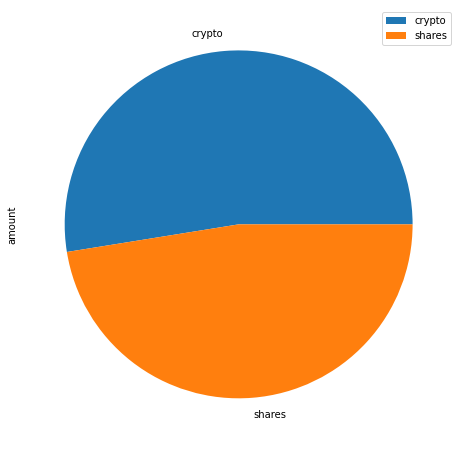

In [77]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(8, 8));

In [79]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()[0]

# Validate saving health with an if/elif/else statement:

if ( total_savings > emergency_fund ):
    print(f'Congratulations you have enough savings = {total_savings} more than emergency funds = {emergency_fund}')
elif total_savings == emergency_fund:
    print(f'Congratulations on reaching enough savings = {total_savings} as emergency fund needed = {emergency_fund}')
else:
    print(f'Your savings = {total_savings} are less than emergency funds = {emergency_fund}')

Congratulations you have enough savings = 93075.434 more than emergency funds = 36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [80]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [82]:
# preview results with print command.
print(df_investments.head())      
print(df_investments.tail())  

                               AGG                                       \
                              open      high      low    close   volume   
time                                                                      
2021-06-15 00:00:00-04:00  114.900  115.0200  114.870  114.995  5842592   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.630  7527672   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.990  7417691   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.290  5438261   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.960  4934966   

                              SPY                                      
                             open      high     low   close    volume  
time                                                                   
2021-06-15 00:00:00-04:00  425.43  425.4600  423.54  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324  
2021-06-17 00:00:00-04:00  421.67  423.

In [84]:
# get the remaining 1 year.
df_investments_rest = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    start = start_date,
    end = end_date
).df
# print to check the new 1 year data extra
print(df_investments_rest.head())
print(df_investments_rest.tail())

                              AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00 

In [88]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Pull 4 prior yrs data
df_stock_data = pd.concat([df_investments_rest, df_investments], axis="rows", join="inner")

#sort data index and organize by date/time
df_stock_data.sort_index
# Display sample data
df_stock_data.head()

# Display sample data
print(df_stock_data.tail())
print(f'Total days of data = {len(df_stock_data)}') 

                               AGG                                        \
                              open      high      low   close     volume   
time                                                                       
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.63  7527672.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.99  7417691.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.29  5438261.0   
2021-06-21 00:00:00-04:00  115.060  115.1200  114.921  114.96  4934966.0   
2021-06-22 00:00:00-04:00  114.830  115.1400  114.830  115.11  5299846.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-06-16 00:00:00-04:00  424.63  424.8700  419.92  422.12  73638324.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.32  421.97  71991686.0  
2021-06-18 00:00:00-0

In [90]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
# should be 5 yrs
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6 ],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [92]:
# view returns
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995329,1.002743,1.007423,1.006474,1.002459,1.006797,1.006081,0.990521,0.999027,1.005560,...,0.993126,1.006132,0.997185,0.999895,0.989680,0.999909,1.006438,1.014137,0.996524,0.995035
2,0.982309,1.002559,1.012235,1.000117,1.017491,1.003425,1.022046,0.981554,0.997423,1.004990,...,0.992015,0.992702,0.993733,1.008766,0.980935,0.992147,1.014251,1.026040,1.005270,0.988640
3,0.973283,0.993963,1.008479,1.005622,1.016381,0.989514,1.027913,0.987785,0.989542,1.002041,...,0.996100,0.991670,0.990338,1.015506,0.968968,0.997774,1.011994,1.018360,1.016238,0.978816
4,0.970194,0.991115,0.998913,0.998328,1.014489,0.999791,1.034178,1.002618,0.990503,0.999655,...,0.996471,0.989025,0.986815,1.020748,0.961692,1.004223,0.995218,1.008587,1.037186,0.976097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,52.313858,27.398016,8.243956,9.296481,10.956724,6.424451,14.197959,13.958863,35.044224,9.760374,...,21.201229,10.368790,24.635668,10.085927,48.052844,54.584791,8.281916,6.718560,30.570600,14.608177
7557,52.294206,27.549021,8.370801,9.212446,11.001601,6.412719,14.324019,13.884302,34.843070,9.605201,...,21.255808,10.343709,24.666734,10.104851,47.771688,54.269173,8.287459,6.627199,30.653498,14.709415
7558,52.543582,27.733899,8.305638,9.178889,10.877829,6.386577,14.247556,13.865544,35.144287,9.803387,...,21.140529,10.243375,24.346181,10.140945,48.225026,53.718512,8.416436,6.609466,30.795020,14.626444
7559,52.257206,27.696528,8.352323,9.216403,10.812820,6.314243,14.244266,13.877456,35.124243,9.781502,...,21.115070,10.405310,24.062620,10.208851,48.242984,54.096395,8.451141,6.631266,30.648875,14.772119


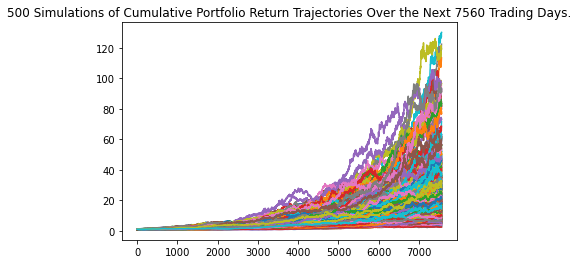

In [94]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

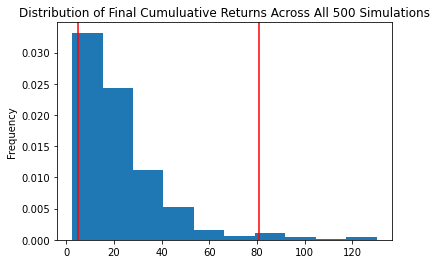

In [95]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             23.194254
std              18.498572
min               2.489424
25%              11.004614
50%              18.191022
75%              28.977712
max             130.221537
95% CI Lower      4.995085
95% CI Upper     80.972517
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [97]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99901.7 and $1619450.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80 ],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [100]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991088,0.992761,1.004774,0.993697,0.989367,1.000261,1.004206,1.009113,1.029101,1.000703,...,0.991331,0.997745,1.005256,1.001988,1.019430,0.988127,1.013306,0.992328,0.987021,0.993893
2,0.998178,0.972840,1.006678,0.990609,0.982299,1.005874,0.991207,1.032581,1.033530,0.997322,...,0.987008,1.003637,1.001227,0.990222,1.006990,0.992487,1.019884,0.986555,0.988173,0.993968
3,1.006447,0.967483,0.997709,0.983597,0.970545,1.005370,0.979445,1.024613,1.035860,1.002122,...,1.002320,0.996558,0.994399,0.993300,1.020420,1.004512,1.029736,0.985717,0.998144,0.994242
4,1.001648,0.958259,0.997071,0.979698,0.966459,1.008261,0.979019,1.018685,1.018164,1.015738,...,0.995959,0.984023,1.019426,0.987404,1.043765,1.012420,1.027627,0.965051,0.999940,0.983354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.546315,1.917871,4.072990,2.119149,3.412551,1.158410,1.589834,2.440790,1.837686,1.665699,...,1.323858,1.409307,1.595528,1.111533,1.767517,1.385932,1.957122,1.565029,1.622557,1.754715
1257,1.547334,1.899908,4.091573,2.101769,3.434939,1.142296,1.553926,2.427989,1.866217,1.682900,...,1.306664,1.404360,1.596404,1.112627,1.798658,1.403330,1.970989,1.536024,1.630489,1.706908
1258,1.543766,1.871890,4.137286,2.078004,3.548298,1.141229,1.554085,2.410768,1.839697,1.673396,...,1.310207,1.421828,1.619730,1.116585,1.818586,1.383146,1.950997,1.540563,1.643838,1.710737
1259,1.542496,1.845776,4.115866,2.074424,3.537441,1.129000,1.586096,2.361899,1.830468,1.657894,...,1.317227,1.425680,1.593599,1.124477,1.814000,1.365276,1.957560,1.543253,1.647956,1.696017


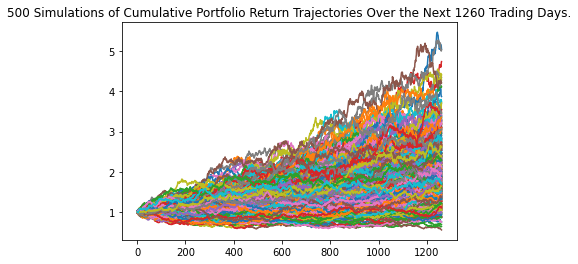

In [101]:
# Plot simulation outcomes
line_plot_5 = MC_even_dist_5.plot_simulation()

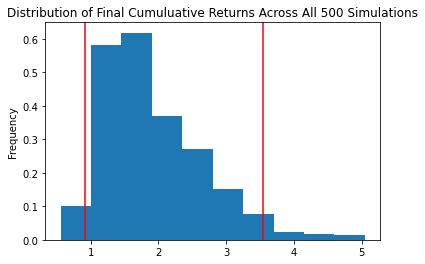

In [102]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_even_dist_5.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_even_dist_5.summarize_cumulative_return()

# Print summary statistics. here are those descriptive statistics again. They quick overview of
# is happening with the investments
print(even_tbl_5)

count           500.000000
mean              1.914216
std               0.744108
min               0.553755
25%               1.366864
50%               1.738370
75%               2.343537
max               5.047013
95% CI Lower      0.917437
95% CI Upper      3.546307
Name: 1260, dtype: float64


In [104]:
# Set initial investment
initial_investment_5 = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5[8]*initial_investment_5,2)
ci_upper_five = round(even_tbl_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $27523.12 and $106389.21


### Ten Years Retirement Option

In [105]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80 ],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [106]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007630,1.000442,0.997035,0.985632,1.003855,1.006912,0.994090,0.984554,0.992615,1.028478,...,1.016707,1.002827,0.999540,1.003603,0.996856,1.005319,0.991978,1.011050,1.008320,1.009552
2,0.993413,1.012339,1.005073,0.978242,0.989650,1.025403,0.995113,0.992854,0.982441,1.043960,...,1.012736,1.003319,0.995775,1.004735,1.009620,1.012644,1.008016,1.013336,0.990031,1.020160
3,1.018248,1.011629,1.013883,0.990630,0.990437,1.020391,0.993020,0.980291,0.994581,1.038501,...,1.028606,1.006341,1.006719,1.005603,1.004435,1.014053,0.998823,1.027167,1.004284,1.030640
4,1.016041,1.014627,1.011930,0.990449,0.989859,1.021418,0.987242,0.972267,1.010734,1.026862,...,1.027284,0.994242,0.996267,0.994156,1.012953,1.020663,1.009475,1.049613,0.988678,1.040021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.432657,1.895220,3.996804,2.323209,3.877931,4.510401,3.963745,3.116371,2.642361,2.607194,...,3.020206,3.467592,16.256697,2.996148,1.823777,2.583551,2.598141,6.186546,5.964789,1.993055
2517,3.439598,1.909450,4.011972,2.342481,3.819205,4.576331,3.935335,3.101106,2.666513,2.666519,...,3.006914,3.490178,16.289263,3.008231,1.819379,2.576205,2.606939,6.190931,5.904340,1.960641
2518,3.395674,1.905703,4.012698,2.324011,3.857101,4.605086,3.926795,3.141864,2.642085,2.703830,...,3.013646,3.515271,16.553704,2.935164,1.804813,2.609610,2.616626,6.229416,5.849065,1.965877
2519,3.410648,1.940368,4.063740,2.324937,3.803431,4.627661,3.862398,3.179651,2.656652,2.659052,...,3.043761,3.522610,16.594188,2.910689,1.801003,2.539926,2.553754,6.281393,5.777892,1.994211


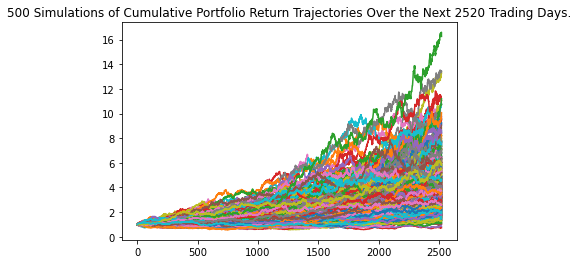

In [109]:
# Plot Line of Simulation Outcomes
# This line graph is probably not the best way to display these returns....(?)

line_plot_10 = MC_even_dist_10.plot_simulation();

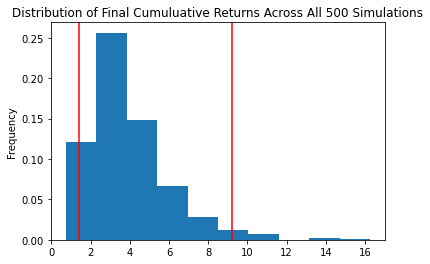

In [111]:

# Plot probability distribution and confidence intervals

dist_plot_10 = MC_even_dist_10.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10)

count           500.000000
mean              3.896502
std               2.070374
min               0.729752
25%               2.466759
50%               3.417790
75%               4.707652
max              16.258977
95% CI Lower      1.381281
95% CI Upper      9.220805
Name: 2520, dtype: float64


In [113]:
# Set initial investment
initial_investment_10 = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the 
# possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10[8]*initial_investment_10,2)
ci_upper_ten = round(even_tbl_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $41438.43 and $276624.16


In [114]:
pwd


'/Users/elizabethcomstock/Desktop/api/05-APIs/Instructions/Starter_Code'